In [3]:
!pip install jovian -q
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import *
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
import jovian
import warnings
warnings.simplefilter("ignore")

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


<IPython.core.display.Javascript object>

In [4]:
"""chem_df = pd.read_csv("dataset/chem_Jacarrd_sim.csv",index_col=0)
indication_df = pd.read_csv("dataset/indication_Jacarrd_sim.csv",index_col=0)
target_df = pd.read_csv("dataset/target_Jacarrd_sim.csv",index_col=0)
transporter_df = pd.read_csv("dataset/transporter_Jacarrd_sim.csv",index_col=0)"""
#------------------ Using only 4 datassets for the model--------------------

"""drug_drug_matrix = pd.read_csv("dataset/drug_drug_matrix.csv",index_col=0) #--> Labels
"""#---------------------------------------------------------------------------

#enzyme_df = pd.read_csv("dataset/enzyme_Jacarrd_sim.csv",index_col=0)
#pathway_df = pd.read_csv("dataset/chem_Jacarrd_sim.csv",index_col=0)
#offsideeffect_df = pd.read_csv("dataset/enzyme_Jacarrd_sim.csv",index_col=0)
#sideeffect_df = pd.read_csv("dataset/enzyme_Jacarrd_sim.csv",index_col=0)

'drug_drug_matrix = pd.read_csv("dataset/drug_drug_matrix.csv",index_col=0) #--> Labels\n'

In [5]:
"""complete_df = chem_df + indication_df + target_df + transporter_df"""

'complete_df = chem_df + indication_df + target_df + transporter_df'

In [ ]:
"""integrated_df = pd.DataFrame(np.zeros((149878, 1096)))
integrated_target = pd.DataFrame(np.zeros((149878,1)))
ind=0
flag=0
for i in range(548):
    for j in range(i,548):
        a = complete_df.iloc[i].to_numpy().reshape(1,-1).tolist()[0]
        b = complete_df.iloc[j].to_numpy().reshape(1,-1).tolist()[0]
        try:
            integrated_df.iloc[ind] = a+b
            integrated_target.iloc[ind] = drug_drug_matrix.iloc[i,j]
            ind+=1
        except:
            flag=1
            break
    if flag:
        break"""

In [6]:
integrated_df = pd.read_csv("../input/integrated-similarity-matrix-for-ddi/integrated jaccard data.csv")

In [7]:
"""integrated_df.to_csv("integrated jaccard data.csv",index=False)"""

'integrated_df.to_csv("integrated jaccard data.csv",index=False)'

In [8]:
"""integrated_target = integrated_target.astype(int)
integrated_target.to_csv("integrated targets.csv", index=False)"""

'integrated_target = integrated_target.astype(int)\nintegrated_target.to_csv("integrated targets.csv", index=False)'

In [9]:
integrated_target = pd.read_csv("../input/integrated-similarity-matrix-for-ddi/integrated targets.csv")

In [10]:
def Model(lr=0.0001):
    model = tf.keras.Sequential([tf.keras.layers.Dense(1024,input_shape=[1,1096],activation="relu"),
                                 tf.keras.layers.Dropout(0.7),
                                 tf.keras.layers.Dense(1024,activation="relu"),
                                 tf.keras.layers.Dropout(0.5),
                                 tf.keras.layers.Dense(512,activation="relu"),
                                 tf.keras.layers.Dense(1,activation="sigmoid")])
    model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss="binary_crossentropy",metrics=["accuracy"])
    return model

In [12]:
try:
    del model
except:
    pass
model = Model()
model.summary()
X_train,X_test,Y_train,Y_test = train_test_split(integrated_df,integrated_target,stratify=integrated_target,test_size=0.1,random_state=0)
logs = model.fit(X_train,Y_train,epochs=1000,validation_split=0.01, batch_size = 8192)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 1024)           1123328   
_________________________________________________________________
dropout (Dropout)            (None, 1, 1024)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 1, 1024)           1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1024)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 1, 512)            524800    
_________________________________________________________________
dense_3 (Dense)              (None, 1, 1)              513       
Total params: 2,698,241
Trainable params: 2,698,241
Non-trainable params: 0
______________________________________________

Epoch 50/1000
17/17 [==============================] - 1s 69ms/step - loss: 0.3578 - accuracy: 0.8428 - val_loss: 0.3072 - val_accuracy: 0.8592
Epoch 51/1000
17/17 [==============================] - 1s 65ms/step - loss: 0.3571 - accuracy: 0.8419 - val_loss: 0.3062 - val_accuracy: 0.8673
Epoch 52/1000
17/17 [==============================] - 1s 62ms/step - loss: 0.3560 - accuracy: 0.8430 - val_loss: 0.3032 - val_accuracy: 0.8666
Epoch 53/1000
17/17 [==============================] - 1s 67ms/step - loss: 0.3543 - accuracy: 0.8432 - val_loss: 0.3004 - val_accuracy: 0.8614
Epoch 54/1000
17/17 [==============================] - 1s 56ms/step - loss: 0.3513 - accuracy: 0.8459 - val_loss: 0.3035 - val_accuracy: 0.8629
Epoch 55/1000
17/17 [==============================] - 1s 60ms/step - loss: 0.3509 - accuracy: 0.8454 - val_loss: 0.3069 - val_accuracy: 0.8592
Epoch 56/1000
17/17 [==============================] - 1s 58ms/step - loss: 0.3484 - accuracy: 0.8467 - val_loss: 0.3037 - val_accuracy:

Epoch 107/1000
17/17 [==============================] - 1s 59ms/step - loss: 0.3014 - accuracy: 0.8719 - val_loss: 0.2728 - val_accuracy: 0.8814
Epoch 108/1000
17/17 [==============================] - 1s 60ms/step - loss: 0.3021 - accuracy: 0.8708 - val_loss: 0.2751 - val_accuracy: 0.8755
Epoch 109/1000
17/17 [==============================] - 1s 60ms/step - loss: 0.3010 - accuracy: 0.8711 - val_loss: 0.2732 - val_accuracy: 0.8866
Epoch 110/1000
17/17 [==============================] - 1s 59ms/step - loss: 0.2998 - accuracy: 0.8722 - val_loss: 0.2718 - val_accuracy: 0.8836
Epoch 111/1000
17/17 [==============================] - 1s 71ms/step - loss: 0.2980 - accuracy: 0.8733 - val_loss: 0.2772 - val_accuracy: 0.8784
Epoch 112/1000
17/17 [==============================] - 1s 62ms/step - loss: 0.2976 - accuracy: 0.8734 - val_loss: 0.2731 - val_accuracy: 0.8792
Epoch 113/1000
17/17 [==============================] - 1s 59ms/step - loss: 0.2980 - accuracy: 0.8731 - val_loss: 0.2782 - val_ac

17/17 [==============================] - 1s 59ms/step - loss: 0.2769 - accuracy: 0.8830 - val_loss: 0.2664 - val_accuracy: 0.8858
Epoch 164/1000
17/17 [==============================] - 1s 58ms/step - loss: 0.2753 - accuracy: 0.8837 - val_loss: 0.2639 - val_accuracy: 0.8851
Epoch 165/1000
17/17 [==============================] - 1s 59ms/step - loss: 0.2751 - accuracy: 0.8847 - val_loss: 0.2608 - val_accuracy: 0.8895
Epoch 166/1000
17/17 [==============================] - 1s 58ms/step - loss: 0.2752 - accuracy: 0.8851 - val_loss: 0.2676 - val_accuracy: 0.8844
Epoch 167/1000
17/17 [==============================] - 1s 59ms/step - loss: 0.2744 - accuracy: 0.8850 - val_loss: 0.2625 - val_accuracy: 0.8807
Epoch 168/1000
17/17 [==============================] - 1s 57ms/step - loss: 0.2731 - accuracy: 0.8844 - val_loss: 0.2721 - val_accuracy: 0.8762
Epoch 169/1000
17/17 [==============================] - 1s 56ms/step - loss: 0.2717 - accuracy: 0.8862 - val_loss: 0.2631 - val_accuracy: 0.8829


17/17 [==============================] - 1s 57ms/step - loss: 0.2619 - accuracy: 0.8907 - val_loss: 0.2612 - val_accuracy: 0.8858
Epoch 220/1000
17/17 [==============================] - 1s 57ms/step - loss: 0.2625 - accuracy: 0.8905 - val_loss: 0.2585 - val_accuracy: 0.8866
Epoch 221/1000
17/17 [==============================] - 1s 60ms/step - loss: 0.2597 - accuracy: 0.8918 - val_loss: 0.2605 - val_accuracy: 0.8866
Epoch 222/1000
17/17 [==============================] - 1s 69ms/step - loss: 0.2604 - accuracy: 0.8908 - val_loss: 0.2648 - val_accuracy: 0.8784
Epoch 223/1000
17/17 [==============================] - 1s 62ms/step - loss: 0.2616 - accuracy: 0.8908 - val_loss: 0.2614 - val_accuracy: 0.8836
Epoch 224/1000
17/17 [==============================] - 1s 60ms/step - loss: 0.2584 - accuracy: 0.8924 - val_loss: 0.2583 - val_accuracy: 0.8873
Epoch 225/1000
17/17 [==============================] - 1s 58ms/step - loss: 0.2577 - accuracy: 0.8927 - val_loss: 0.2627 - val_accuracy: 0.8866


17/17 [==============================] - 1s 59ms/step - loss: 0.2488 - accuracy: 0.8971 - val_loss: 0.2615 - val_accuracy: 0.8895
Epoch 276/1000
17/17 [==============================] - 1s 58ms/step - loss: 0.2506 - accuracy: 0.8959 - val_loss: 0.2625 - val_accuracy: 0.8895
Epoch 277/1000
17/17 [==============================] - 1s 58ms/step - loss: 0.2530 - accuracy: 0.8944 - val_loss: 0.2619 - val_accuracy: 0.8821
Epoch 278/1000
17/17 [==============================] - 1s 57ms/step - loss: 0.2513 - accuracy: 0.8957 - val_loss: 0.2617 - val_accuracy: 0.8858
Epoch 279/1000
17/17 [==============================] - 1s 59ms/step - loss: 0.2522 - accuracy: 0.8947 - val_loss: 0.2655 - val_accuracy: 0.8836
Epoch 280/1000
17/17 [==============================] - 1s 59ms/step - loss: 0.2506 - accuracy: 0.8951 - val_loss: 0.2627 - val_accuracy: 0.8858
Epoch 281/1000
17/17 [==============================] - 1s 57ms/step - loss: 0.2514 - accuracy: 0.8952 - val_loss: 0.2656 - val_accuracy: 0.8903


17/17 [==============================] - 1s 57ms/step - loss: 0.2451 - accuracy: 0.8987 - val_loss: 0.2602 - val_accuracy: 0.8888
Epoch 332/1000
17/17 [==============================] - 1s 60ms/step - loss: 0.2445 - accuracy: 0.8985 - val_loss: 0.2605 - val_accuracy: 0.8836
Epoch 333/1000
17/17 [==============================] - 1s 73ms/step - loss: 0.2443 - accuracy: 0.8976 - val_loss: 0.2573 - val_accuracy: 0.8910
Epoch 334/1000
17/17 [==============================] - 1s 58ms/step - loss: 0.2424 - accuracy: 0.8989 - val_loss: 0.2559 - val_accuracy: 0.8881
Epoch 335/1000
17/17 [==============================] - 1s 59ms/step - loss: 0.2412 - accuracy: 0.9005 - val_loss: 0.2618 - val_accuracy: 0.8851
Epoch 336/1000
17/17 [==============================] - 1s 57ms/step - loss: 0.2408 - accuracy: 0.9004 - val_loss: 0.2621 - val_accuracy: 0.8918
Epoch 337/1000
17/17 [==============================] - 1s 58ms/step - loss: 0.2422 - accuracy: 0.8999 - val_loss: 0.2578 - val_accuracy: 0.8903


17/17 [==============================] - 1s 56ms/step - loss: 0.2352 - accuracy: 0.9034 - val_loss: 0.2626 - val_accuracy: 0.8866
Epoch 388/1000
17/17 [==============================] - 1s 58ms/step - loss: 0.2373 - accuracy: 0.9012 - val_loss: 0.2614 - val_accuracy: 0.8881
Epoch 389/1000
17/17 [==============================] - 1s 55ms/step - loss: 0.2384 - accuracy: 0.9013 - val_loss: 0.2625 - val_accuracy: 0.8910
Epoch 390/1000
17/17 [==============================] - 1s 57ms/step - loss: 0.2384 - accuracy: 0.9016 - val_loss: 0.2612 - val_accuracy: 0.8858
Epoch 391/1000
17/17 [==============================] - 1s 61ms/step - loss: 0.2396 - accuracy: 0.9002 - val_loss: 0.2572 - val_accuracy: 0.8910
Epoch 392/1000
17/17 [==============================] - 1s 60ms/step - loss: 0.2402 - accuracy: 0.9002 - val_loss: 0.2583 - val_accuracy: 0.8784
Epoch 393/1000
17/17 [==============================] - 1s 67ms/step - loss: 0.2411 - accuracy: 0.8995 - val_loss: 0.2515 - val_accuracy: 0.8940


17/17 [==============================] - 1s 59ms/step - loss: 0.2355 - accuracy: 0.9026 - val_loss: 0.2585 - val_accuracy: 0.8844
Epoch 444/1000
17/17 [==============================] - 1s 70ms/step - loss: 0.2344 - accuracy: 0.9033 - val_loss: 0.2598 - val_accuracy: 0.8829
Epoch 445/1000
17/17 [==============================] - 1s 58ms/step - loss: 0.2320 - accuracy: 0.9046 - val_loss: 0.2574 - val_accuracy: 0.8925
Epoch 446/1000
17/17 [==============================] - 1s 59ms/step - loss: 0.2316 - accuracy: 0.9042 - val_loss: 0.2615 - val_accuracy: 0.8836
Epoch 447/1000
17/17 [==============================] - 1s 58ms/step - loss: 0.2318 - accuracy: 0.9046 - val_loss: 0.2572 - val_accuracy: 0.8881
Epoch 448/1000
17/17 [==============================] - 1s 55ms/step - loss: 0.2351 - accuracy: 0.9036 - val_loss: 0.2640 - val_accuracy: 0.8851
Epoch 449/1000
17/17 [==============================] - 1s 59ms/step - loss: 0.2331 - accuracy: 0.9036 - val_loss: 0.2556 - val_accuracy: 0.8918


17/17 [==============================] - 1s 63ms/step - loss: 0.2291 - accuracy: 0.9052 - val_loss: 0.2588 - val_accuracy: 0.8784
Epoch 500/1000
17/17 [==============================] - 1s 61ms/step - loss: 0.2297 - accuracy: 0.9043 - val_loss: 0.2614 - val_accuracy: 0.8777
Epoch 501/1000
17/17 [==============================] - 1s 56ms/step - loss: 0.2301 - accuracy: 0.9053 - val_loss: 0.2545 - val_accuracy: 0.8910
Epoch 502/1000
17/17 [==============================] - 1s 59ms/step - loss: 0.2298 - accuracy: 0.9050 - val_loss: 0.2569 - val_accuracy: 0.8918
Epoch 503/1000
17/17 [==============================] - 1s 59ms/step - loss: 0.2277 - accuracy: 0.9056 - val_loss: 0.2546 - val_accuracy: 0.8947
Epoch 504/1000
17/17 [==============================] - 1s 62ms/step - loss: 0.2254 - accuracy: 0.9072 - val_loss: 0.2583 - val_accuracy: 0.8844
Epoch 505/1000
17/17 [==============================] - 1s 73ms/step - loss: 0.2275 - accuracy: 0.9056 - val_loss: 0.2616 - val_accuracy: 0.8829


17/17 [==============================] - 1s 71ms/step - loss: 0.2245 - accuracy: 0.9080 - val_loss: 0.2608 - val_accuracy: 0.8844
Epoch 556/1000
17/17 [==============================] - 1s 61ms/step - loss: 0.2234 - accuracy: 0.9079 - val_loss: 0.2644 - val_accuracy: 0.8807
Epoch 557/1000
17/17 [==============================] - 1s 70ms/step - loss: 0.2245 - accuracy: 0.9074 - val_loss: 0.2589 - val_accuracy: 0.8873
Epoch 558/1000
17/17 [==============================] - 1s 61ms/step - loss: 0.2238 - accuracy: 0.9076 - val_loss: 0.2582 - val_accuracy: 0.8851
Epoch 559/1000
17/17 [==============================] - 1s 59ms/step - loss: 0.2249 - accuracy: 0.9070 - val_loss: 0.2619 - val_accuracy: 0.8881
Epoch 560/1000
17/17 [==============================] - 1s 59ms/step - loss: 0.2250 - accuracy: 0.9070 - val_loss: 0.2614 - val_accuracy: 0.8873
Epoch 561/1000
17/17 [==============================] - 1s 57ms/step - loss: 0.2229 - accuracy: 0.9084 - val_loss: 0.2583 - val_accuracy: 0.8933


17/17 [==============================] - 1s 58ms/step - loss: 0.2189 - accuracy: 0.9101 - val_loss: 0.2666 - val_accuracy: 0.8799
Epoch 612/1000
17/17 [==============================] - 1s 59ms/step - loss: 0.2192 - accuracy: 0.9097 - val_loss: 0.2589 - val_accuracy: 0.8888
Epoch 613/1000
17/17 [==============================] - 1s 58ms/step - loss: 0.2200 - accuracy: 0.9100 - val_loss: 0.2619 - val_accuracy: 0.8888
Epoch 614/1000
17/17 [==============================] - 1s 59ms/step - loss: 0.2187 - accuracy: 0.9100 - val_loss: 0.2622 - val_accuracy: 0.8873
Epoch 615/1000
17/17 [==============================] - 1s 66ms/step - loss: 0.2180 - accuracy: 0.9103 - val_loss: 0.2571 - val_accuracy: 0.8910
Epoch 616/1000
17/17 [==============================] - 1s 70ms/step - loss: 0.2186 - accuracy: 0.9102 - val_loss: 0.2641 - val_accuracy: 0.8888
Epoch 617/1000
17/17 [==============================] - 1s 63ms/step - loss: 0.2182 - accuracy: 0.9103 - val_loss: 0.2565 - val_accuracy: 0.8881


17/17 [==============================] - 1s 61ms/step - loss: 0.2182 - accuracy: 0.9102 - val_loss: 0.2614 - val_accuracy: 0.8829
Epoch 668/1000
17/17 [==============================] - 1s 60ms/step - loss: 0.2189 - accuracy: 0.9092 - val_loss: 0.2633 - val_accuracy: 0.8821
Epoch 669/1000
17/17 [==============================] - 1s 58ms/step - loss: 0.2179 - accuracy: 0.9107 - val_loss: 0.2519 - val_accuracy: 0.8888
Epoch 670/1000
17/17 [==============================] - 1s 60ms/step - loss: 0.2185 - accuracy: 0.9088 - val_loss: 0.2617 - val_accuracy: 0.8873
Epoch 671/1000
17/17 [==============================] - 1s 57ms/step - loss: 0.2207 - accuracy: 0.9087 - val_loss: 0.2618 - val_accuracy: 0.8895
Epoch 672/1000
17/17 [==============================] - 1s 61ms/step - loss: 0.2166 - accuracy: 0.9108 - val_loss: 0.2547 - val_accuracy: 0.8895
Epoch 673/1000
17/17 [==============================] - 1s 58ms/step - loss: 0.2165 - accuracy: 0.9114 - val_loss: 0.2569 - val_accuracy: 0.8858


17/17 [==============================] - 1s 56ms/step - loss: 0.2142 - accuracy: 0.9122 - val_loss: 0.2627 - val_accuracy: 0.8873
Epoch 724/1000
17/17 [==============================] - 1s 60ms/step - loss: 0.2137 - accuracy: 0.9118 - val_loss: 0.2543 - val_accuracy: 0.8962
Epoch 725/1000
17/17 [==============================] - 1s 76ms/step - loss: 0.2154 - accuracy: 0.9111 - val_loss: 0.2601 - val_accuracy: 0.8829
Epoch 726/1000
17/17 [==============================] - 1s 59ms/step - loss: 0.2156 - accuracy: 0.9105 - val_loss: 0.2652 - val_accuracy: 0.8925
Epoch 727/1000
17/17 [==============================] - 1s 60ms/step - loss: 0.2170 - accuracy: 0.9103 - val_loss: 0.2627 - val_accuracy: 0.8807
Epoch 728/1000
17/17 [==============================] - 1s 59ms/step - loss: 0.2133 - accuracy: 0.9129 - val_loss: 0.2581 - val_accuracy: 0.8888
Epoch 729/1000
17/17 [==============================] - 1s 57ms/step - loss: 0.2142 - accuracy: 0.9114 - val_loss: 0.2582 - val_accuracy: 0.8873


17/17 [==============================] - 1s 56ms/step - loss: 0.2117 - accuracy: 0.9133 - val_loss: 0.2583 - val_accuracy: 0.8814
Epoch 780/1000
17/17 [==============================] - 1s 57ms/step - loss: 0.2143 - accuracy: 0.9122 - val_loss: 0.2599 - val_accuracy: 0.8873
Epoch 781/1000
17/17 [==============================] - 1s 59ms/step - loss: 0.2114 - accuracy: 0.9133 - val_loss: 0.2570 - val_accuracy: 0.8903
Epoch 782/1000
17/17 [==============================] - 1s 56ms/step - loss: 0.2127 - accuracy: 0.9125 - val_loss: 0.2589 - val_accuracy: 0.8895
Epoch 783/1000
17/17 [==============================] - 1s 59ms/step - loss: 0.2133 - accuracy: 0.9122 - val_loss: 0.2579 - val_accuracy: 0.8866
Epoch 784/1000
17/17 [==============================] - 1s 57ms/step - loss: 0.2137 - accuracy: 0.9114 - val_loss: 0.2567 - val_accuracy: 0.8933
Epoch 785/1000
17/17 [==============================] - 1s 70ms/step - loss: 0.2134 - accuracy: 0.9124 - val_loss: 0.2619 - val_accuracy: 0.8866


17/17 [==============================] - 1s 68ms/step - loss: 0.2110 - accuracy: 0.9134 - val_loss: 0.2644 - val_accuracy: 0.8851
Epoch 836/1000
17/17 [==============================] - 1s 63ms/step - loss: 0.2084 - accuracy: 0.9142 - val_loss: 0.2633 - val_accuracy: 0.8866
Epoch 837/1000
17/17 [==============================] - 1s 62ms/step - loss: 0.2113 - accuracy: 0.9131 - val_loss: 0.2612 - val_accuracy: 0.8881
Epoch 838/1000
17/17 [==============================] - 1s 60ms/step - loss: 0.2091 - accuracy: 0.9140 - val_loss: 0.2616 - val_accuracy: 0.8866
Epoch 839/1000
17/17 [==============================] - 1s 59ms/step - loss: 0.2089 - accuracy: 0.9133 - val_loss: 0.2603 - val_accuracy: 0.8895
Epoch 840/1000
17/17 [==============================] - 1s 60ms/step - loss: 0.2087 - accuracy: 0.9138 - val_loss: 0.2628 - val_accuracy: 0.8888
Epoch 841/1000
17/17 [==============================] - 1s 59ms/step - loss: 0.2098 - accuracy: 0.9135 - val_loss: 0.2593 - val_accuracy: 0.8888


17/17 [==============================] - 1s 61ms/step - loss: 0.2081 - accuracy: 0.9144 - val_loss: 0.2657 - val_accuracy: 0.8903
Epoch 892/1000
17/17 [==============================] - 1s 61ms/step - loss: 0.2094 - accuracy: 0.9139 - val_loss: 0.2617 - val_accuracy: 0.8955
Epoch 893/1000
17/17 [==============================] - 1s 61ms/step - loss: 0.2109 - accuracy: 0.9129 - val_loss: 0.2583 - val_accuracy: 0.8918
Epoch 894/1000
17/17 [==============================] - 1s 70ms/step - loss: 0.2091 - accuracy: 0.9138 - val_loss: 0.2604 - val_accuracy: 0.8925
Epoch 895/1000
17/17 [==============================] - 1s 66ms/step - loss: 0.2094 - accuracy: 0.9134 - val_loss: 0.2602 - val_accuracy: 0.8933
Epoch 896/1000
17/17 [==============================] - 1s 63ms/step - loss: 0.2111 - accuracy: 0.9129 - val_loss: 0.2615 - val_accuracy: 0.8910
Epoch 897/1000
17/17 [==============================] - 1s 60ms/step - loss: 0.2091 - accuracy: 0.9139 - val_loss: 0.2600 - val_accuracy: 0.8903


17/17 [==============================] - 1s 58ms/step - loss: 0.2051 - accuracy: 0.9152 - val_loss: 0.2631 - val_accuracy: 0.8866
Epoch 948/1000
17/17 [==============================] - 1s 62ms/step - loss: 0.2063 - accuracy: 0.9147 - val_loss: 0.2678 - val_accuracy: 0.8829
Epoch 949/1000
17/17 [==============================] - 1s 59ms/step - loss: 0.2047 - accuracy: 0.9158 - val_loss: 0.2672 - val_accuracy: 0.8784
Epoch 950/1000
17/17 [==============================] - 1s 59ms/step - loss: 0.2040 - accuracy: 0.9164 - val_loss: 0.2675 - val_accuracy: 0.8858
Epoch 951/1000
17/17 [==============================] - 1s 60ms/step - loss: 0.2057 - accuracy: 0.9157 - val_loss: 0.2674 - val_accuracy: 0.8858
Epoch 952/1000
17/17 [==============================] - 1s 61ms/step - loss: 0.2047 - accuracy: 0.9167 - val_loss: 0.2647 - val_accuracy: 0.8829
Epoch 953/1000
17/17 [==============================] - 1s 74ms/step - loss: 0.2041 - accuracy: 0.9159 - val_loss: 0.2609 - val_accuracy: 0.8888


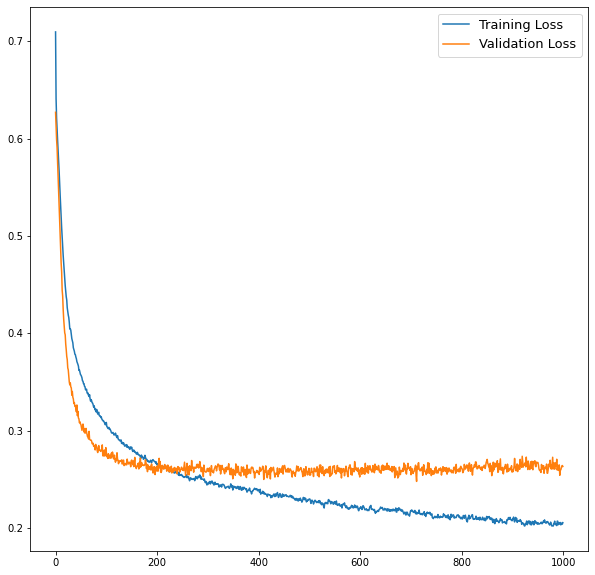

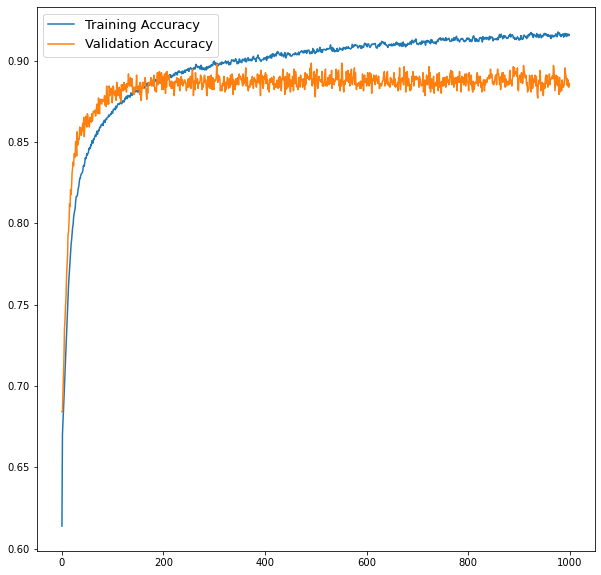

In [13]:
plt.figure(figsize=(10,10))
plt.plot(logs.history["loss"],label="Training Loss")
plt.plot(logs.history["val_loss"],label="Validation Loss")
plt.legend(fontsize=13)
plt.show()
plt.figure(figsize=(10,10))
plt.plot(logs.history["accuracy"],label="Training Accuracy")
plt.plot(logs.history["val_accuracy"],label="Validation Accuracy")

plt.legend(fontsize=13)
plt.show()

# Training Accuracy

In [14]:
preds = model.predict(X_train)
preds = pd.DataFrame(preds)
preds = preds.apply(pd.cut,bins=2,labels=[0,1])
print(f"Accuracy: {accuracy_score(Y_train,preds)}")
print(f"Precision Score: {precision_score(Y_train,preds)}")
print(f"Recall Score: {recall_score(Y_train,preds)}")
print(f"F1-Score: {f1_score(Y_train,preds)}")
print(f"ROC AUC Score: {roc_auc_score(Y_train,preds)}")

Accuracy: 0.9506338498035436
Precision Score: 0.9283807312826465
Recall Score: 0.917959783307318
F1-Score: 0.9231408488094277
ROC AUC Score: 0.9420898493874915


# Testing Accuracy

In [15]:
preds = model.predict(X_test)
preds = pd.DataFrame(preds)
preds = preds.apply(pd.cut,bins=2,labels=[0,1])
print(f"Accuracy: {accuracy_score(Y_test,preds)}")
print(f"Precision Score: {precision_score(Y_test,preds)}")
print(f"Recall Score: {recall_score(Y_test,preds)}")
print(f"F1-Score: {f1_score(Y_test,preds)}")
print(f"ROC AUC Score: {roc_auc_score(Y_test,preds)}")

Accuracy: 0.8880437683480118
Precision Score: 0.8297872340425532
Recall Score: 0.821900826446281
F1-Score: 0.8258252024081378
ROC AUC Score: 0.8707454467272793


In [16]:
jovian.commit(project="ddi using ANNs 2",environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Uploading notebook to https://jovian.ml/apr2000cbe/ddi using ANNs 2


<IPython.core.display.Javascript object>

In [ ]:
"""{'chem': 0.899, #2
 'target': 0.787, #4
 'transporter': 0.945, #1
 'enzyme': 0.734,
 'pathway': 0.767, 
 'indication': 0.802, #3
 'sideeffect': 0.778,
 'offsideeffect': 0.782}"""

In [ ]:
model.predict(X_train.iloc[0,:].to_numpy().reshape(1,-1))
for i in range(Y_train.shape[0]):
    if Y_train.iloc[i][0]==1:
        print(i)

In [ ]:
model.predict(X_train.iloc[2602,:].to_numpy().reshape(1,-1))